In [1]:
from IPython.display import Image



# Классификация текстов

При подготовке использовались материалы Е. Черняк
( echernyak@hse.ru )



## Постановка задачи

* $d \in D$ – документы
* $c \in C$ – классы 


* Бинарная классификация: $C = \{0, 1\}$ 
* Многоклассовая классификация [multiclass classification]: $C = \{0, ..., K\}$
* Многотемная классификация [multi-label classification]: $C = \{0,1\}^K$

## Примеры

* Фильтрация спама: $C = \{spam, ham\}$ – бинарная классификация
* Классификация по тональности: $C =  \{neutral, positive, negative\}$ – классификация с тремя классами
* Рубрикация: $C \in \{религия, праздники, спорт, фестивали, ... \}$ – классификация на несколько тем
* Определение языка текста: $C \in \{Rus, Sr, Ukr, Bel, Kaz, Bul ... \}$
* Определение авторства:
    * Этим ли автором написан текст: $ C = \{0, 1\}$?
    * Кем из этих авторов написан текст: $ C = \{a_1, a_2, a_3, ... \}$?
    * Пол автора: $ C = \{f, m\}$


## Методы классификации


### По правилам

* Если в предложении встречается личное местоимение первого лица и глагол с окончанием женского рода, то пол автора = $f$.
* Если доля положительно окрашенных прилагательтельных в отзыве больше доли отрицательно окрашенных прилагательных, то отзыв относится к классу $posititive$.


### С использованием алгоритмов машинного обучения 

$ \gamma : D \rightarrow C$ - алгоритм классификации

$({D^{train}, C^{train}})$ – обучающее множество 

$({D^{test}, C^{test}})$ – тестовое множество 

#### Основные методы
* Метод наивного Байеса
* Логистическая регрессия 
* Сверточные нейронные сети
* FastText

## Меры качества бинарной классификации 

<table>
  <tr>
    <th colspan="2" rowspan="2"></th>
    <th colspan="2">gold <br>standart</th>
  </tr>
  <tr>
    <td>positive</td>
    <td>negative</td>
  </tr>
  <tr>
    <td rowspan="2">classification <br>output</td>
    <td>positive</td>
    <td>$tp$</td>
    <td>$fp$</td>
  </tr>
  <tr>
    <td>negative</td>
    <td>$fn$</td>
    <td>$tn$</td>
  </tr>
</table>


$precision = Pr =  \frac{tp}{tp+fp} $ – точность 

$recall = R = \frac{tp}{tp+fn} $ – полнота 

$F_2 = \frac{2 Pr * R}{Pr + R}$ – $F$-мера 

$accuracy = \frac{tp + tn}{tp + fp + fn + tn}$ –  аккуратность  

## Меры качества многоклассовой классификации 

<table>
  <tr>
    <th></th>
    <th></th>
    <th colspan="3">gold <br>standart</th>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td>$class_1$</td>
    <td>$class_2$</td>
    <td>$class_3$</td>
  </tr>
  <tr>
    <td rowspan="3">classification <br>output</td>
    <td>$class_1$</td>
    <td>$tp_1$</td>
    <td>$fp_{12}$</td>
    <td>$fp_{13}$</td>
  </tr>
  <tr>
    <td>$class_2$</td>
    <td>$fn_{21}$</td>
    <td>$tp_2$</td>
    <td>$fp_{23}$</td>
  </tr>
  <tr>
    <td>$class_3$</td>
    <td>$fn_{31}$</td>
    <td>$fn_{32}$</td>
    <td>$tp_3$</td>
  </tr>
</table>


Микро-усреднение:

$micro-precision = micro-Pr =  \frac{\sum tp_i}{\sum tp_i + \sum fp_i} $ 

$micro-recall = micro-R = \frac{\sum tp_i}{\sum tp_i+ \sum fn_i } $

Макро-усреднение:

$macro-precision = macro-Pr =  \frac{\sum Pr_i}{|C|} $

$macro-recall = macro-R = \frac{\sum R_i}{|C|} $ 





## Источники данных
* IMDB 
* newsgroups 20
* Reuters 
* Кинопоиск
* Научные статьи
* 


## (Напоминание) Векторная модель: документ – вектор признаков 

* $d \in D$ – документы
* $w \in V$ – словарь, всего слов |V|

* традиционное представление: одно слово – одна размерность в векторной модели: $\vec{d_i} = <f_1, ... , f_{|V|}> $
* $f$ – компоненты вектора – могут быть:
    * 0 и 1
    * частотами
    * $tf-idf$ весами
* с использованием распределенных представлений слов [word embeddings]:
    * покомпонентное среднее векторов слов, входящих в текст
    * покомпонентный максимум векторов слов, входящих в текст
* с использованием распределенных представлений текстов [doc embeddings]:
    * doc2vec
    * fastText
    * снижение размерности в векторной модели, в т. ч. сингулярное разложение [singular value decomposition, SVD]

## (Напоминание) Вычисление расстояния / близости между документами 

Евклидово расстояние: $ dist( \vec{d_i}, \vec{d_j}) = \sqrt { \sum_{k} ( d_i^k - d_j^k)^2 }$

Косинусная мера близости: $ sim( \vec{d_i}, \vec{d_j}) =  \cos(\theta )=  \frac{ \vec{d_i}\cdot \vec{d_j} }{\| \vec{d_i} \|_{2}\|\vec{d_j} \|_{2}}$

## Метод ближайшего соседа  [Nearest neighbor classifier]

Найдем $k$ ближайших соседей (самых близких документов) для документа $d$. Посмотрим на то, каким классам относятся документы: выберем модальный класс – будем считать его классом $d$.





In [2]:

from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, twenty_train.target)

In [5]:
import numpy as np
from sklearn.metrics import *
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=0)
X_test = count_vect.transform(twenty_test.data)
print(X_test.shape)
predicted = clf.predict(X_test)

(1502, 35788)


In [7]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.5599
micro F1=0.5599, micro P=0.5599, micro R=0.5599
macro F1=0.5507, macro P=0.5580, macro R=0.5963



/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


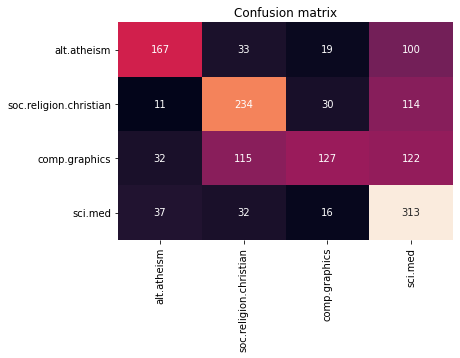

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [9]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => comp.graphics
OpenGL on the GPU is fast => comp.graphics


## Метод наивного Байеса  [Multinomial naive Bayes classifier]

Требуется оценить вероятность принадлежности документа $d \in D$ классу $c \in C$: $p(c|d)$. Каждый документ –  мешок слов, всего слов $|V|$.
	
$p(c)$ – априорная вероятность класса $c$
   
$p(c|d)$ – апостериорная вероятность класса $c$
	
	




$ p(c|d) = \frac{p(d|c)p(c)}{p(d)} $

Пусть документ $d$ описан признаками $f_1, \dots, f_N$.

$ c_{NB} = \arg \max _{c \in C} p (c|d) = \arg \max_{c \in C}  \frac{p(d|c)p(c)}{p(d)} \propto $
	
$ \propto \arg \max_{c \in C} p(d|c)p(c)  = \arg \max_{c \in C} p(f_1, f_2, \dots, f_{N} | c)p(c)$

### Предположение о независимости 

* Мешок слов: порядок слов не имеет значения
* Условная независимость (наивное предположение): вероятности признаков $p(f_i|c_j)$ внутри класса $c_j$ независимы

$p(f_1, f_2, \dots, f_{N} | c) \times  p(c) =   p(f_1|c) \times p(f_2|c) \times \dots \times p(f_{N}|c)  \times p(c)$



$C_{NB}=\arg \max_{c \in C} p(c) \times \prod_{1 \le i \le N} p(f_i|c) $

Допустим, что признаки $f_i$ – слова $w_i$, а $\texttt{positions}$ – все позиции слов в документе.


$C_{NB} = p(c) \times \prod_{i \in \texttt{positions}} p(w_i|c) $

<img src="https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/bow.png" width="600">

### Обучение наивного Байесовского классификатора

#### ММП оценки вероятностей:
	
$ \widehat{p_(c_j)} = \frac{| \{d| d \in c_j\} |}{|D|} $
	
$ \widehat{p(w_i | c_j)} = \frac{\texttt{count}(w_i, c_j)}{\sum_{w \in V} \texttt{count}(w, c_j)} $
	
Создаем $|C|$ мегадокументов: каждый документ = все документы в одном классе, склеенные в один мегадокумент и вычисляем частоты $w$ в мегадокументах.
	


#### Проблема нулевых вероятностей:  

$\texttt{count}(w_i, c_j)$ может быть равно нулю. 

Допустим, что каждое слово встречается как минимум $\alpha$ раз в мешке слов.
	
Преобразование Лапласа: $ \frac{+\alpha}{+\alpha |V|}$
	
$ \widehat{p(w_i | c_j)} = \frac{\texttt{count}(w_i, c_j) + \alpha}{(\sum_{w \in V} \texttt{count}(w, c_j)) + \alpha |V| } $

### Пример. Тематическая классификация
	
    


<table>
  <tr>
    <th></th>
    <th>документ</th>
    <th>класс</th>
  </tr>
  <tr>
    <td rowspan="4">обучающее<br>множество</td>
    <td>Chinese Beijing Chinese</td>
    <td>c</td>
  </tr>
  <tr>
    <td>Chinese Chinese Shanghai</td>
    <td>c</td>
  </tr>
  <tr>
    <td>Chinese Macao</td>
    <td>c</td>
  </tr>
  <tr>
    <td>Tokyo Japan Chinese</td>
    <td>j</td>
  </tr>
  <tr>
    <td>тестовое<br>множество</td>
    <td>Chinese Chinese Chinese Tokyo Japan</td>
    <td>?</td>
  </tr>
</table>




$p(c) =\frac{3}{4}$,$p(j) = \frac{1}{4}$

$p(\texttt{Chinese|c)}= (5+1)/(8+6)=6/14=3/7$  

$p(\texttt{Chinese|j)}= (1+1)/(3+6)=2/9$  

$p(\texttt{Tokyo|c)}= (0+1)/(8+6)=1/14$  

$p(\texttt{Tokyo|j)}= (1+1)/(3+6)=2/9$  

$p(\texttt{Japan|c)}= (0+1)/(8+6)=1/14$  

$p(\texttt{Japan|j)}= (1+1)/(3+6)=2/9$


$p(c|d_5) = 3/4 \times (3/7)^3 \times 1/14 \times 1/14 \approx 0.0003$

$p(j|d_5) = 1/4 \times (2/9)^3 \times 2/9 \times 2/9 \approx 0.0001$

### Мультиномиальный наивный Байсовский классификатор

Слова в тексте распределены по мультиномиальному закону:

$ p(d |c )={\frac {(\sum _{i}x_{i})!}{\prod _{i}x_{i}!}}\prod _{i}{p_{ki}}^{x_{i}} $


In [11]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [12]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.9341
micro F1=0.9341, micro P=0.9341, micro R=0.9341
macro F1=0.9330, macro P=0.9326, macro R=0.9341



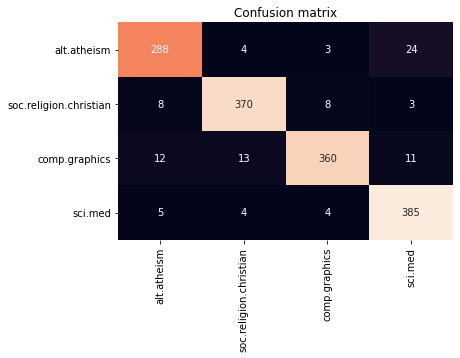

In [13]:
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [14]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


## Логистическая регрессия (метод максимальной энтропии [MaxEnt])

Требуется оценить вероятность принадлежности документа $d \in D$ классу $c \in C$: $p(c|d)$. Пусть заданы признаки  $f_i \in F$ – множество признаков и  $w_i$ – их веса. 

Признаки могут зависеть от классов: $f_i(c,d)$  

Линейная комбинация этих признаков: $\sum_{i=1}^k w_i f_i(c,d)$.  

Как связана $\sum_{i=1}^k w_i f_i(c,x)$ и $p(c|d)$?
	
$p(c|d) = \frac{1}{Z} e^{\sum_{i=1}^k w_i f_i(c,d)},$
	
где $\frac{1}{Z} = \frac{1}{\sum_{c' \in C} e^{\sum_{i=1}^k w_i f_i(c',d)} }.$

$ \widehat{c} = \texttt{argmax}_{c \in C} p (c|d) = \texttt{argmax}_{c \in C} \frac{e^{\sum_{i=1}^k w_i f_i(c,d)}}{\sum_{c' \in C} e^{\sum_{i=1}^k w_i f_i(c',d)}}  \propto  \texttt{argmax}_{c \in C} e^{\sum_{i=1}^k w_i f_i(c,d)}   \propto  \texttt{argmax}_{c \in C} \sum_{i=1}^k w_i f_i(c,d).  $


### Пример. Классификация по тональности на $C = <+,->$
	
Используем индикаторные признаки
	

*... there are virtually no surprises, and the writing is second-rate. So why did I enjoy it so much? For one thing, the cast is great ...*
	 

<table>
  <tr>
    <th>признак</th>
    <th>значение</th>
    <th></th>
    <th>вес</th>
  </tr>
  <tr>
    <td>$f_1$</td>
    <td>1</td>
    <td> "great" $\in d$ и $c=+$</td>
    <td rowspan="2">1.9</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>
  
   <tr>
    <td>$f_2$</td>
    <td>1</td>
    <td>"second-rate" $\in d$ и $c=-$</td>
    <td rowspan="2">0.9</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>

   <tr>
    <td>$f_3$</td>
    <td>1</td>
    <td>"no" $\in d$ и $c=-$ </td>
    <td rowspan="2">0.7</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>
  
   <tr>
    <td>$f_4$</td>
    <td>1</td>
    <td>"enjoy" $\in d$ и $c=-$ </td>
    <td rowspan="2">-0.8</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>

   <tr>
    <td>$f_4$</td>
    <td>1</td>
    <td>"great" $\in d$ и $c=-$ </td>
    <td rowspan="2">-0.6</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>




</table>
	






класс $+$:  $1.9 + 0 + 0 + 0 + 0 = 1.9$
	
класс $-$: $0 + 0.9 + 0.7 - 0.8 - 0.6 =0.2$

$p(+|d) = \frac{e^{1.9}}{e^{1.9}+e^{0.2}}$
	
$p(-|d) = \frac{e^{0.2}}{e^{1.9}+e^{0.2}}$

### Поиск весов логистической регрессии

Для каждой пары $(c,d)$: $ \widehat{w} = \texttt{argmax}_{w} \log p(c|d) $
		
Максимизация логарифмического правдоподобия: $L(w) =  \sum_{j} \log p(c_{j}|d) $
	
При использовании индикаторных признаков, методы выпуклой оптимизации позволяют выбрать модель с максимальной энтропией.

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8928
micro F1=0.8928, micro P=0.8928, micro R=0.8928
macro F1=0.8900, macro P=0.8890, macro R=0.8962



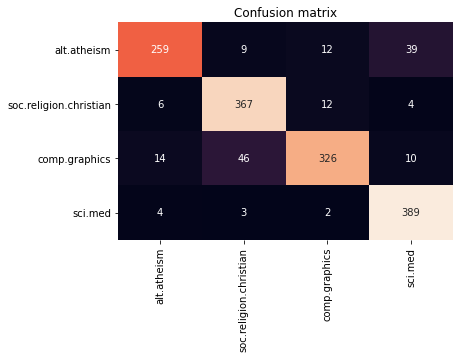

In [19]:

sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [20]:
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


## Метод опорных векторов [Support vector machine, SVM]


<img src="https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/svm_1.png" width="200" align='right'>


$a(x) = sign(<w,x>+b)$ – классификатор, задающий разделяющую гиперплоскость

$ \min_{x \in X} |<w,x>+b| = 1$ – нормировка параметров

Требуется построить разделяющую гиперплоскость шириной $ \frac{2}{||w||}$ (т.е. $2 ~ \times $ расстояние от разделяющей гиперплоскости до ближайшего объекта обучающего множества, иначе отступ).


Оптимизационная задача (если выборка линейно разделима):

$ \frac{1}{2} ||w||^2 \rightarrow \min_{w,b} $

$ y_i(<w_i, x_i> + b) \geq 1 $



Kernel trick: $k(x ,x')=\langle  x ,x' \rangle $.



Конспекты Е. Соколова: https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture05-linclass.pdf

Multi-class SVM: https://nlp.stanford.edu/IR-book/html/htmledition/multiclass-svms-1.html

In [10]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [11]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8908
micro F1=0.8908, micro P=0.8908, micro R=0.8908
macro F1=0.8880, macro P=0.8868, macro R=0.8936



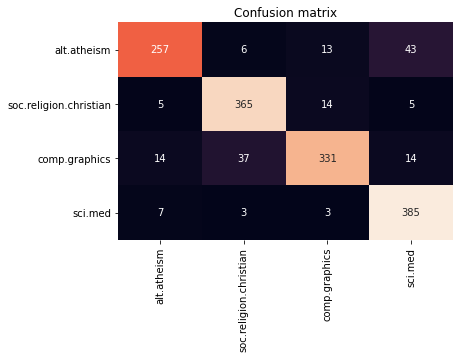

In [12]:
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [13]:
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


## Деревья решений 



<img src="https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/decision-tree.png" width="300" align='center'>

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [15]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7423
micro F1=0.7423, micro P=0.7423, micro R=0.7423
macro F1=0.7381, macro P=0.7386, macro R=0.7415



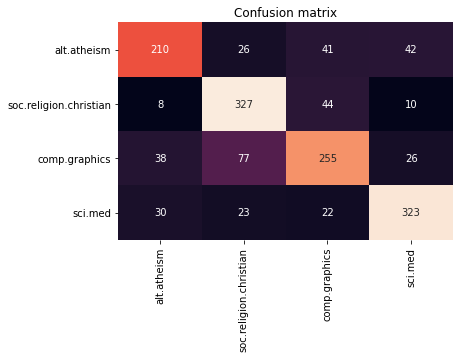

In [16]:
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

# Другие методы классификации

**Линейные методы**: 


**Деревья решений**:

* Градиентный бустинг [Xgboost]
* Случайный лес [Random forest]



**Ансамбли классификаторов**

Общая идея: слова или $n$-грамы (термы) – это признаки, тексты – объекты, т.е. матрица терм-документ



# Кроссвалидация

![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cv.png)

# Отбор признаков



** Веса **:
* $tf-idf$, $\chi^2$ для взвешивания слов
* меры ассоциации биграм для отбора биграм: $(P)PMI$, $t-score$




** Уменьшение количества признаков **:
* лемматизация
* стемминг
* удаление стоп-слов
* пороги на частоту ($min\_tf$)
* пороги на документную частоту ($max\_df$)




** Признаки **:
* $n$-грамы 
* символьные $n$-грамы  (подслова, subwords)
* именованные сущности 
* термины
* "не\_" + слово 
* сохраним $N$ самых частых слов, остальные представим подсловами и символьными
$n$-грамами



** Снижение размерности **:
* скрытые темы в качестве признаков

# Оптимизация гиперпараметров

** Гиперпараметры **:
* $n$ - длина $n$-грамы
* пороги на частоту ($min\_tf$)
* пороги на документную частоту ($max\_df$)
* $\alpha$ в преобразовании Лапласа 
* и др.


![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/gs.png)

# Конвеер в sklearn

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])
text_clf

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(2, 3))),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [29]:
text_clf.fit(twenty_train.data, twenty_train.target)  
predicted = text_clf.predict(twenty_test.data)

In [30]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8216
micro F1=0.8216, micro P=0.8216, micro R=0.8216
macro F1=0.8222, macro P=0.8184, macro R=0.8481



In [31]:
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


# Как на самом деле делается классификация по тональности 

* Классификация на уровне предложений: выражено ли в предложении отношение к чему-то?
* Если да, то к чему – к каким аспектам?
* Построение аггрегированной оценки

![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/tonsum.png)

# Классификация текстов

## Сеть прямого распространения  для классификации текстов


![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/mlp.png)

* $x$ - входное векторное представление текста
* $h$ – скрытые слои с нелинейными функциями активации
* $y$ – выходы, как правило, один $y$ соответствует одной метке класса 

$NN_{MLP2}(x) = y$

$h_1 = g^1(xW^1 + b^1)$

$h_2 = g^2(h^1 W^2 + b^2)$

$y = h^2 W^3$

### Нелинейные функции активации

![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/activation.png)

### dropout-регуляризация

$NN_{MLP2}(x) = y$

$h_1 = g^1(xW^1 + b^1)$

$m^1 \sim Bernouli(r^1)$

$\hat{h^1} = m^1 \odot h^1$

$h_2 = g^2(\hat{h^1} W^2 + b^2)$

$m^2 \sim Bernouli(r^2)$

$\hat{h^2} = m^2 \odot h^2$

$y =\hat{h^2} W^3$



### Векторное представление текста 
* BOW (bag of words) – разреженное (sparse) векторное представление текста
* CBOW (continious bag of words)  – плотное (dense) векторное представление текста

$w_i$ – слово, $d_{emb}$ – размерность эмбеддинга слова, $E_{[w_i]}$ = $\textbf{w}_i$


#### Padding
Входные тексты имеют переменную длинну, что неудобно, поэтому предположим, что они все состоят из одинакового количества слов, только часть из этих слов – баластные символы pad


#### Неизвестные слова (OOV)
Если в тестовом множестве встретилось неизвестное слово, то можно 
* заменить его на pad;
* заменить его на unk.  Однако в обучающем множестве unk никогда не встречается, поэтому его нужно добавить в обучающее множество искусственным образом. 


#### Word dropout - регуляризация 
Заменяем каждое слово на unk с вероятностью $\frac{\alpha}{|V| + \alpha}$


In [17]:
!pip install keras 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import random
random.seed(1228)

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

%matplotlib inline

You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
data = pd.read_csv("/NLP/data/izvestya/articles_lemmatized_noSW.csv")
data = data[data.topic.isin(("Культура", "Общество", "Политика", "Экономика", "Спорт"))] 
train_corpus = pd.DataFrame(columns=data.columns)
test_corpus = pd.DataFrame(columns=data.columns)

for topic in data.topic.unique():
    corpus_sample = data[data.topic==topic].sample(110)
    train_corpus = train_corpus.append(corpus_sample.iloc[:100, :])
    test_corpus = test_corpus.append(corpus_sample.iloc[100:, :])

FileNotFoundError: [Errno 2] No such file or directory: '/NLP/data/izvestya/articles_lemmatized_noSW.csv'

In [19]:
TEXT_LENGTH = 1800
VOCABULARY_SIZE = 250000
EMBEDDING_DIM = 300
DIMS = 250
MAX_FEATURES = 5000
batch_size = 32

nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 10

## Сеть прямого распространения

In [41]:
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_corpus.body)
tokenizer

NameError: name 'train_corpus' is not defined

In [ ]:
sequences = tokenizer.texts_to_sequences(train_corpus.body)
X_train = tokenizer.sequences_to_matrix(sequences, mode='count')
sequences = tokenizer.texts_to_sequences(test_corpus.body)
X_test = tokenizer.sequences_to_matrix(sequences, mode='count')

In [ ]:
print('First seq:',sequences[0])
print('First doc:',X_train[0])

In [ ]:
le = LabelEncoder()
le.fit(train_corpus.topic.unique())
y_train = np_utils.to_categorical(le.transform(train_corpus.topic), 5)
y_test = np_utils.to_categorical(le.transform(test_corpus.topic), 5)
y_true = le.transform(test_corpus.topic)
print(y_train[0])

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(MAX_FEATURES,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)

In [ ]:
model.summary()

In [ ]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_true, y_pred))
labels = test_corpus.topic.unique()
y_true = le.inverse_transform(y_true)
y_pred = le.inverse_transform(y_pred)
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
sequences = tokenizer.texts_to_sequences(train_corpus.body)
X_train = pad_sequences(sequences, maxlen=TEXT_LENGTH)
sequences = tokenizer.texts_to_sequences(test_corpus.body)
X_test = pad_sequences(sequences, maxlen=TEXT_LENGTH)

In [ ]:
X_train[0]

In [ ]:
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE, EMBEDDING_DIM, input_length=TEXT_LENGTH))
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

In [ ]:
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
%%time

import numpy as np
emb_path = '/NLP/embeddings/wiki.ru.vec'

words = []

embeddings_index = {}
f = open(emb_path)
for line in f:
    values = line.split()
    if len(values) == 301:
        word = values[0]
        words.append(word)
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()

In [ ]:
print(len(embeddings_index))

In [ ]:
word_index = tokenizer.word_index
len(word_index)

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=TEXT_LENGTH,
                            trainable=False))
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)


In [ ]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

In [ ]:
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## Сверточные нейронные сети [Convolutional neural networks, CNN]

* Заимствованы из области компьютерного зрения
* Пик популярности пришелся на 2014 (до +10% аккуратности в задачах классификации), со временем были вытеснены рекуррентными нейронными сетями 
* Помогают справиться  с проблемой переменной длины входов (CNN VS window-based NN)

### Слой свертки

#### Фильтр [filter]:
* $w_{1,n}$ – последовательность слов, $k$  – размер окна
* $w_i$ , $d_{emb}$ – размерность эмбеддинга слова,  $\textbf{w}_i \in \mathbb{R}^{d_{emb}} $
* $\textbf{x}_i = [\textbf{w}_{i}, \textbf{w}_{i+1}, \ldots, \textbf{w}_{i+k-1}]$, $\textbf{x}_i \in \mathbb{R}^{k d_{emb}}$

Фильтр: $p_i = g(\textbf{x}_i  u)$, $p_i \in \mathbb{R}$, $u \in \mathbb{R}^{k d_{emb}}$


![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cnn1.png)


Преобразуем каждое входное окно, но пока размерность входа не уменьшается!

#### Слой субдискретизации (пулинга, [pooling])

* $h_i$ – выходные значения фильтра

$\max$-пулинг:	$c = \max_i h_i$


![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cnn2.png)

* Выбираем самый важный признак из полученных на предыдущем шаге 
* Можем использовать и $\min$, и усреднение



### Классификатор на основе сверточной сети

* $y \in [0,1] $ - истинные значения
* $\widehat{y} = c$ - предсказанные значения

![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cnn3.png)

Для обучения сверточной сети можно использовать обычный алгоритм распространения ошибки

Одномерные фильтры – это сильное ограничение. Что делать, если $c=0.5$?

#### Многомерные фильтры

Используем $\textit{l}$ разных фильтров: $u_{1}, \ldots, u_{\textit{l}}$: 

$\textbf{x}_i = [\textbf{w}_{i}, \textbf{w}_{i+1}, \ldots, \textbf{w}_{i+k-1}]$

$\textbf{p}_i = g(\textbf{x}_i \cdot  U+b)$

$\textbf{p}_i \in \mathbb{R}^{\textit{l}} $, $\textbf{x}_i \in \mathbb{R}^{k d_{emb}}$, $U \in \mathbb{R}^{k d_{emb} \times \textit{l}}$, $b \in \mathbb{R}^{\textit{l}} $

![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cnn4.png)


$\max$-пулинг:	$c_j = \max_i h_{i,j}, j \in [0,\textit{l}]$


#### Шаг окна 
Можно использовать непересекающиеся окна, чтобы уменьшить объем вычисления

![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cnn5.png)

### Как выбирать вектора слов? 
* Случайная инициализация (если нет обученных моделей word2vec, GloVe)
* word2vec, GloVe без обновления
* word2vec, GloVe c обновлением на каждой эпохе (увеличивается количество параметров!)
* Несколько каналов: копируем два входа и
    * на один подаем word2vec и не обновляем эти входы во время обучения, на второй подаем word2vec и обновляем эти входы во время обучения
    * на один вход подаем word2vec, на второй – GloVe

### Как использовать pad?

[[мое первое короткое предложение], [второе очень длинное предложение, которое никогда не заканчивается], [третье предложение]]

* Неэффективный способ: одно предложение – одна эпоха
* Окружить все предложения баластными символами pad и сделать их одной длины
* Надо убедиться, что $\max$-пулинг не выберет значения, соответствующие pad
* Надо убрать выбросы, то есть, супер-длинные предложения, возникшие, например, из-за ошибок сегментатора


## Классификация текстов с помощью CNN



![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cnn6.png)

Zhang, Y., & Wallace, B. A Sensitivity Analysis of (and Practitioners' Guide to) Convolutional Neural Networks for Sentence Classification. 2015 

![title](https://raw.githubusercontent.com/echernyak/ML-for-compling/d6b4f82e788cd7b365ea711db2ac4b0fc7a361d0/img/cnn7.png)

Kim Y. Convolutional Neural Networks for Sentence Classification. 2014

## Современные модели

emb + bilstm + softmax
![image](https://miro.medium.com/max/2700/1*QBrVVvYps5zo6QtBRRq4fA.png)

В 2018 году SOTA-модель для текстовой классификации - ULMFiT. 
Идея: 
1. Предобучаем языковую модель на большом корпусе
2. Дообучаем языковую модель на корпусе нашей задачи
3. Меняем последние слои, и обучаем модель для другой задачи (например, задачи классификации), постепенно размораживая веса


![title](https://datawarrior.files.wordpress.com/2018/07/image_9.png?w=1400)

Howard, Ruder. Universal Language Model Fine-tuning for Text Classification. 2018

В 2019 году SOTA-модель - XLNet. 

Новая языковая модель, исправляющая проблемы BERT:

BERT предобучается на двух задачах. Одна из них - заполнение пропусков по предложению "Я пришел в [MASK] и купил [MASK]".  10% всех слов при обучении маскируются. Но в режиме инференса масок нет, это неправильно.
XLNet обучается на всех возможных перестановках предложения, для каждой перестановки предсказывая определенный токен по всем предыдущим.



![title](https://hsto.org/webt/yq/mb/fa/yqmbfas9mcnfkciq6pmew_-4hh8.png)

![title](https://hsto.org/webt/hs/fb/u-/hsfbu-ufj-9e-me1agkauoa389c.png)

Yang et al., XLNet: Generalized Autoregressive Pretraining
for Language Understanding. 2019


Код для семинара:
https://colab.research.google.com/drive/1woA9rMcNHbf6wHOEvRrxrRIYgbPAYcwP